In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#밑에는 초기 세팅(개인화)
plt.rcParams['figure.figsize'] = [10,8]
sns.set(style='whitegrid')
sns.set_palette('pastel')
warnings.filterwarnings('ignore')

In [ ]:
import matplotlib
# 한글이 깨지는 경우
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
  #윈도우인 경우
  font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
  rc('font',family=font_name)
else:
  #mac인 경우
  rc('font', family='AppleGothic')

  matplotlib.rcParams['axes.unicode_minus']=False

In [ ]:
# Loading 'Tips' dataset from seaborn
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
tips.shape

(244, 7)

In [ ]:
#matplotlib 을 활용한 시각화
sum_tip_by_day = tips.groupby('day')['tip'].sum()
sum_tip_by_day

day
Thur    171.83
Fri      51.96
Sat     260.40
Sun     247.39
Name: tip, dtype: float64

In [ ]:
x_label =['Thu', 'Fri','Sat','Sun']
x_label_index = np.arange(len(x_label))
x_label_index

array([0, 1, 2, 3])

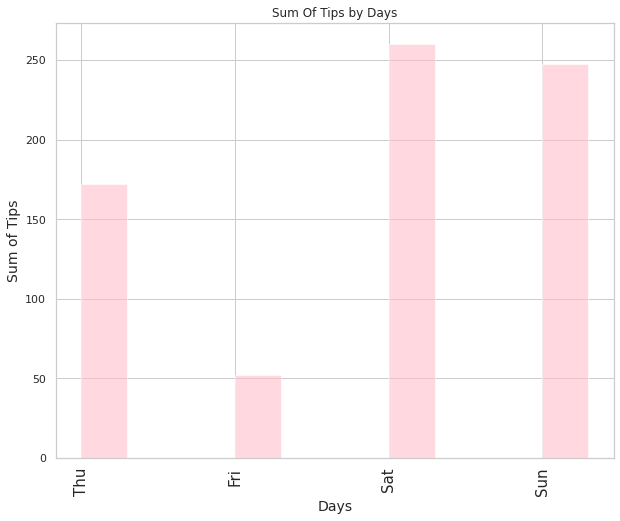

In [ ]:
# Bar 차트 이해 및 제작
plt.bar(x_label, sum_tip_by_day,
        color='pink', # 색지정
        alpha=0.6,    # 투명도
        width=0.3,    # 너비
        align='edge') # 배치
plt.title('Sum Of Tips by Days')
plt.xlabel('Days', fontsize=14)
plt.ylabel('Sum of Tips', fontsize=14)
plt.xticks(x_label_index,
           x_label,
           rotation=90,
           fontsize=15)
plt.show()  #이걸 해줘야 글자같은게 안뜨고 깔끔하게 뜬다.

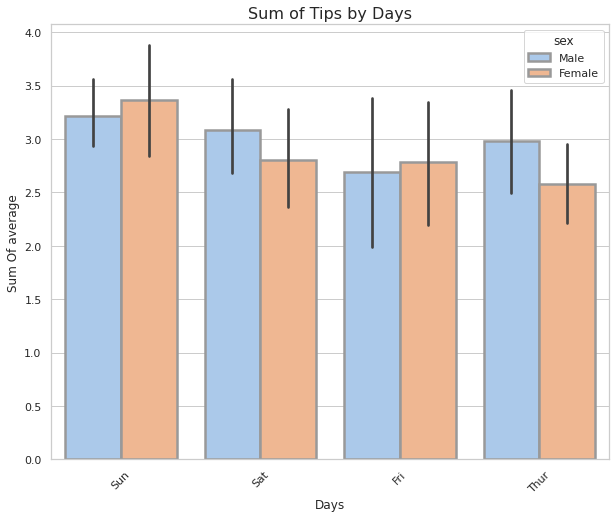

In [ ]:
#seaborn을 활용한 시각화
sns.barplot(data=tips, #데이터프레임)
            x='day',            # x변수
            y='tip',            # y변수
            estimator=np.average,   # 기준
            hue='sex',          # 색깔 구분으로 특정컬럼값을 비교
            order=['Sun','Sat','Fri','Thur'], # x ticks 순서
            edgecolor='.6',     # 바 모서리 선명도
            linewidth=2.5)      # 모서리 두께
plt.title('Sum of Tips by Days', fontsize=16)
plt.xlabel('Days')
plt.ylabel('Sum Of Tip')
plt.xticks(rotation=45)
plt.show()

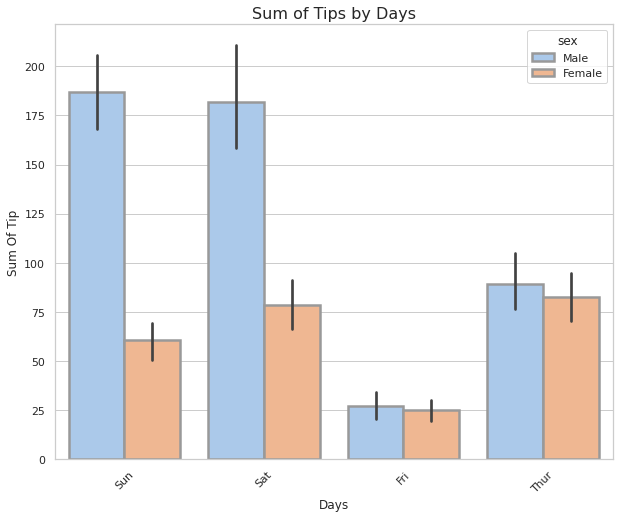

In [ ]:
#seaborn을 활용한 시각화
sns.barplot(data=tips, #데이터프레임)
            x='day',            # x변수
            y='tip',            # y변수
            estimator=np.sum,   # 기준
            hue='sex',          # 색깔 구분으로 특정컬럼값을 비교
            order=['Sun','Sat','Fri','Thur'], # x ticks 순서
            edgecolor='.6',     # 바 모서리 선명도
            linewidth=2.5)      # 모서리 두께
plt.title('Sum of Tips by Days', fontsize=16)
plt.xlabel('Days')
plt.ylabel('Sum Of Tip')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Pie 차트 이해 및 제작
# matplotlib를 활용한 시각화
sum_tip_by_day = tips.groupby('day')['tip'].sum()
ratio_tip_by_day = sum_tip_by_day/sum_tip_by_day.sum()


day
Thur    0.234875
Fri     0.071024
Sat     0.355942
Sun     0.338159
Name: tip, dtype: float64

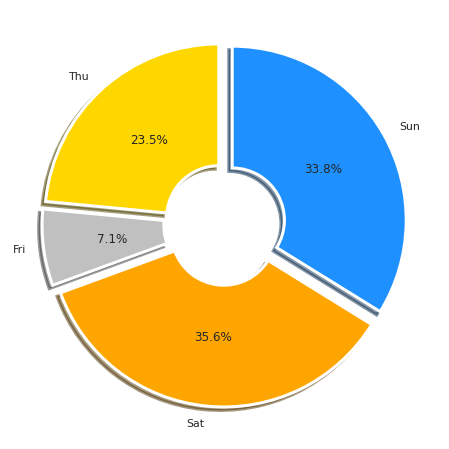

In [ ]:
x_label =['Thu', 'Fri','Sat','Sun']

plt.pie(ratio_tip_by_day,   # 비율값
        labels=x_label,     # 라벨 값
        autopct='%.1f%%',   # 몇 %인지 나타내줌 1f는 f는 실수 1은 소수점 1자리까지
        startangle=90,      # 축이 시작되는 각도 설정
        counterclock=True,  # 시계방향으로 표시 true는 시계방향 false는 반시계방향
        explode=[0.05, 0.05, 0.05, 0.05], # 중심에서 벗어나는 정도
        shadow=True,        # 그림자 표시
        colors=['gold','silver','orange','dodgerblue'], # 색깔
        wedgeprops={'width':0.7, 'edgecolor':'w', 'linewidth':3}) # 도넛 차트를 그릴때 사용
plt.show()

In [ ]:
# Line 차트 이해 및 제작
# matplotlib를 활용해서 시각화
# line 차트 예제를 위해, tips 데이터에 가상 시간 컬럼 추가하기
# 일요일 데이터만 사용
sun_tips = tips[tips['day']=='Sun']
sun_tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
186,20.90,3.50,Female,Yes,Sun,Dinner,3
187,30.46,2.00,Male,Yes,Sun,Dinner,5
188,18.15,3.50,Female,Yes,Sun,Dinner,3
189,23.10,4.00,Male,Yes,Sun,Dinner,3


In [ ]:
#현재 서버 시간을 얻기 위해 datetime 라이브러리 사용
import datetime
date=[]
today = datetime.date.today()
date.append(today)

for i in range(sun_tips.shape[0]-1):
  today += datetime.timedelta(1)  #하루씩 증가
  date.append(today)
date

[datetime.date(2022, 7, 12),
 datetime.date(2022, 7, 13),
 datetime.date(2022, 7, 14),
 datetime.date(2022, 7, 15),
 datetime.date(2022, 7, 16),
 datetime.date(2022, 7, 17),
 datetime.date(2022, 7, 18),
 datetime.date(2022, 7, 19),
 datetime.date(2022, 7, 20),
 datetime.date(2022, 7, 21),
 datetime.date(2022, 7, 22),
 datetime.date(2022, 7, 23),
 datetime.date(2022, 7, 24),
 datetime.date(2022, 7, 25),
 datetime.date(2022, 7, 26),
 datetime.date(2022, 7, 27),
 datetime.date(2022, 7, 28),
 datetime.date(2022, 7, 29),
 datetime.date(2022, 7, 30),
 datetime.date(2022, 7, 31),
 datetime.date(2022, 8, 1),
 datetime.date(2022, 8, 2),
 datetime.date(2022, 8, 3),
 datetime.date(2022, 8, 4),
 datetime.date(2022, 8, 5),
 datetime.date(2022, 8, 6),
 datetime.date(2022, 8, 7),
 datetime.date(2022, 8, 8),
 datetime.date(2022, 8, 9),
 datetime.date(2022, 8, 10),
 datetime.date(2022, 8, 11),
 datetime.date(2022, 8, 12),
 datetime.date(2022, 8, 13),
 datetime.date(2022, 8, 14),
 datetime.date(2022, 8,

In [ ]:
sun_tips['date']=date
sun_tips

,total_bill,tip,sex,smoker,day,time,size,date
0,16.99,1.01,Female,No,Sun,Dinner,2,2022-07-12
1,10.34,1.66,Male,No,Sun,Dinner,3,2022-07-13
2,21.01,3.50,Male,No,Sun,Dinner,3,2022-07-14
3,23.68,3.31,Male,No,Sun,Dinner,2,2022-07-15
4,24.59,3.61,Female,No,Sun,Dinner,4,2022-07-16
...,...,...,...,...,...,...,...,...
186,20.90,3.50,Female,Yes,Sun,Dinner,3,2022-09-21
187,30.46,2.00,Male,Yes,Sun,Dinner,5,2022-09-22
188,18.15,3.50,Female,Yes,Sun,Dinner,3,2022-09-23
189,23.10,4.00,Male,Yes,Sun,Dinner,3,2022-09-24


findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


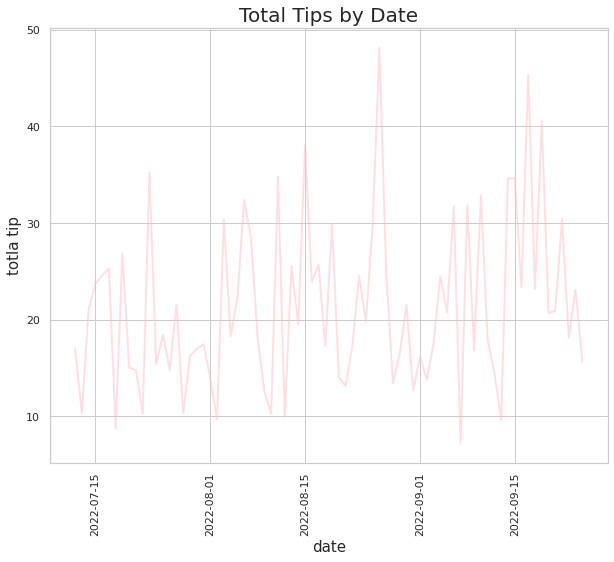

In [ ]:
# line chart
plt.plot(sun_tips['date'],sun_tips['total_bill'],
         linestyle='-', # 라인 모양
         linewidth=2,   # 라인 두꼐
         color='pink',  # 색상
         alpha=0.5,     # 투명도
         )
plt.title('Total Tips by Date', fontsize=20)
plt.xlabel('date', fontsize=15)
plt.ylabel('totla tip', fontsize=15)
plt.xticks(rotation=90)
plt.show()

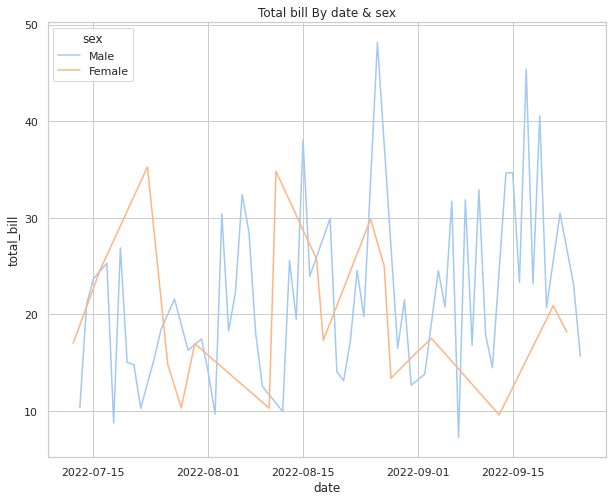

In [ ]:
# seaborn 을 활용한 시각화
sns.lineplot(data=sun_tips,
             x='date',
             y='total_bill',
             hue='sex')
plt.title('Total bill By date & sexb')
plt.show()

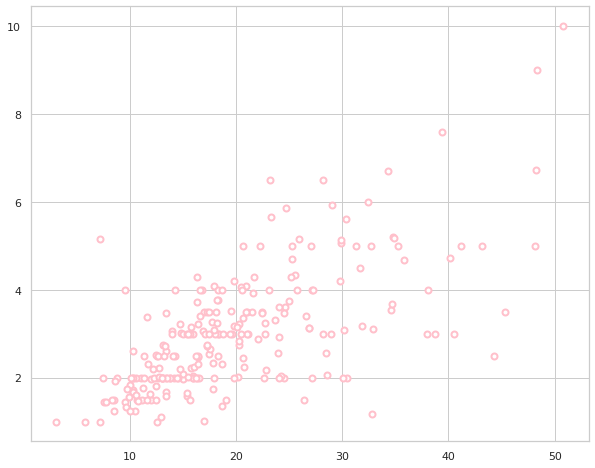

In [79]:
#Scatter 차트 이해 및 제작

# matplotlib 을 활용한 시각화
plt.scatter(tips['total_bill'], tips['tip'],
            color='white',
            edgecolor='pink',
            linewidth=2)
plt.show()

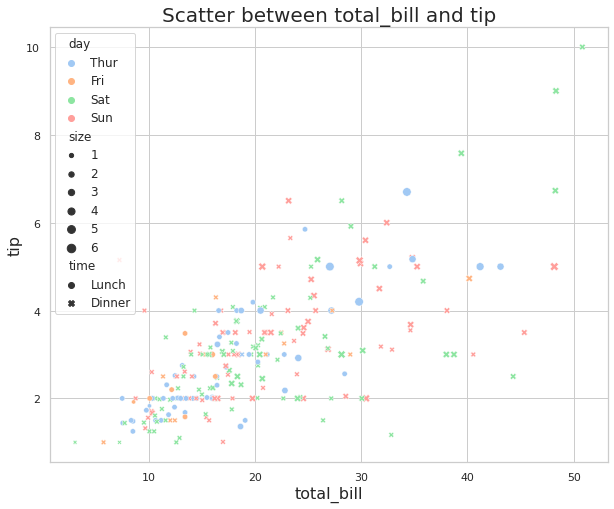

In [85]:
#seaborn을 활용한 시각화
sns.scatterplot(data=tips,
                x='total_bill',
                y='tip',
                style='time', # 모양 구분으로 다른 변수랑 비교
                hue='day',     # 색깔구분으로 다른 변수랑 비교
                size='size', #크기 구분으로 다른 변수랑 비교
                
                )
plt.title('Scatter between total_bill and tip', fontsize=20)
plt.xlabel('total_bill', fontsize=16)
plt.ylabel('tip', fontsize=16)
plt.show()

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


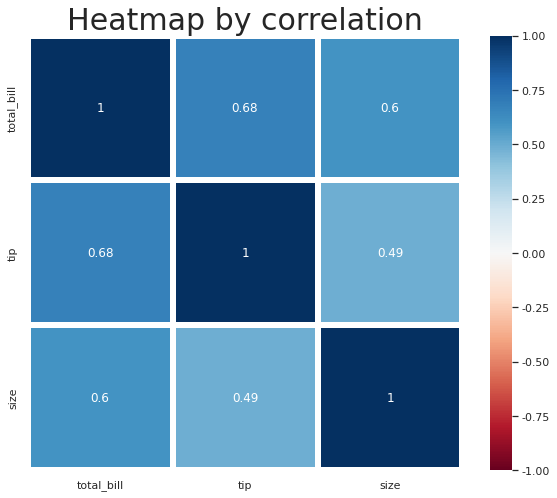

In [93]:
# heat Map 차트 이해 및 제작

#seaborn을 활용한 시각화
sns.heatmap(tips.corr(),
            annot=True,       # 박스안 corr값 표시할지 말지
            square=True,      # 박스를 정사각형으로 할지 말지
            vmin=-1, vmax=1,  # 최소 최대값 지정
            linewidth=5,      # 라인 두께 지정
            cmap='RdBu')      # 색상 선택
plt.title('Heatmap by correlation', fontsize=30)
plt.show()

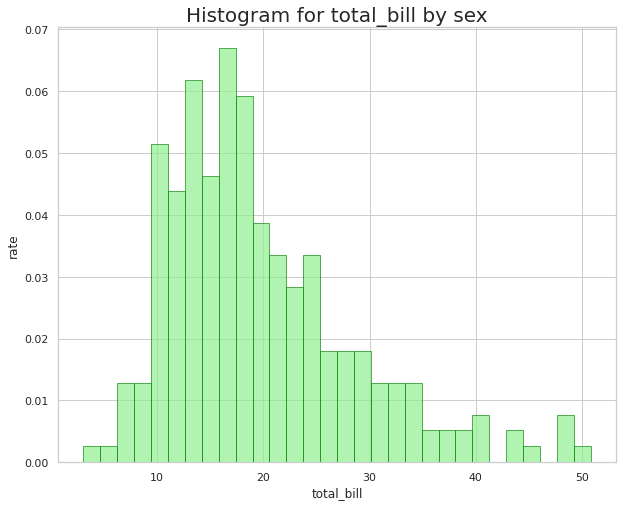

In [119]:
# Histogram 차트 이해 및 제작
# matplotlib를 활용한 시각화

plt.hist(tips['total_bill'],    #도수 분포를 알아보는 표, 히스토그램
         bins=30,
         density=True,          # 비율로 보고싶으면 True 개수로 보고싶으면 False
         alpha=0.7,
         color='lightgreen',
         edgecolor='green',
         linewidth=0.9)
plt.title('Histogram for total_bill', fontsize=20)
plt.xlabel('total_bill')
plt.ylabel('rate')
plt.show()

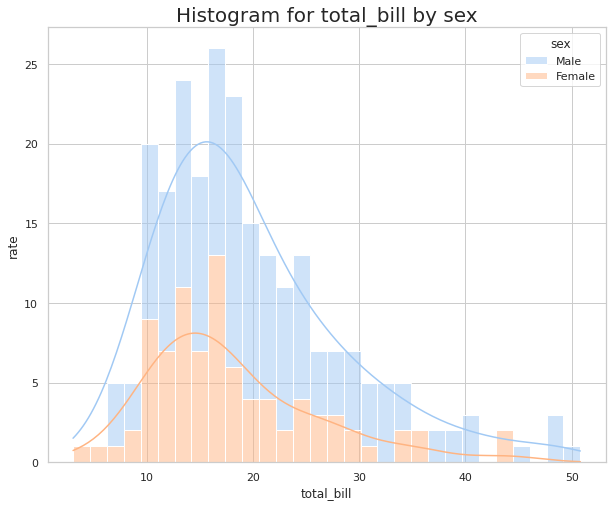

In [120]:
# seaborn을 활용한 시각화
sns.histplot(data=tips,
             x='total_bill',
             bins=30,
             kde=True,    # 커널 댄시티 애스토네이트 의 약자
             hue='sex',
             multiple='stack',
             )
plt.title('Histogram for total_bill by sex', fontsize=20)
plt.xlabel('total_bill')
plt.ylabel('rate')
plt.show()

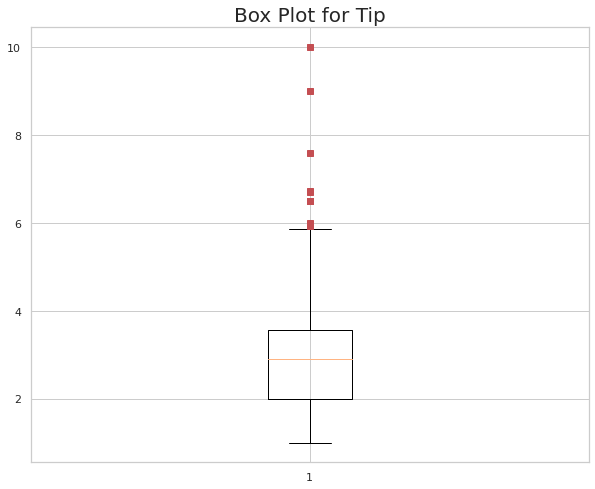

In [141]:
#Box 차트 이해 및 제작

#matplotlib를 활용한 시각화
plt.boxplot(tips['tip'],
            sym='rs')     #rs는 Res 스퀘어

plt.title('Box Plot for Tip', fontsize=20)
plt.show()

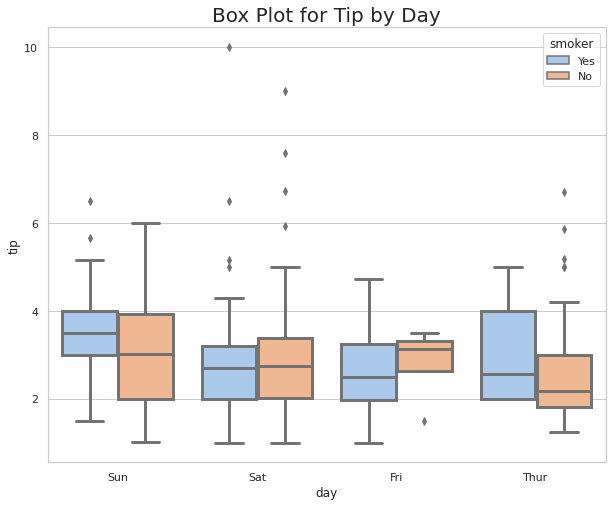

In [151]:
# seaborn을 활용한 시각화
sns.boxplot(data=tips,
            x = 'day',
            y='tip',
            hue='smoker',
            linewidth=3,
            order=['Sun','Sat','Fri','Thur'])
plt.title('Box Plot for Tip by Day', fontsize=20)
plt.show()